<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [32]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [33]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [34]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'preferential_attachment_followers',
       'preferential_attachment_followees', 'svd_u_s_1', 'svd_u_s_2',
       'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1',
       'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6',
       'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5',
       'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4',
       'svd_v_d_5', 'svd_v_d_6', 'svd_dot_u', 'svd

In [35]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [36]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

### 1.1 Random Forest

 20%|██        | 1/5 [00:00<00:03,  1.31it/s]

Estimators =  10 Train Score 0.9081029611153085 test Score 0.884097378595403


 40%|████      | 2/5 [00:02<00:03,  1.03s/it]

Estimators =  50 Train Score 0.9224740587479232 test Score 0.9137253244282876


 60%|██████    | 3/5 [00:05<00:03,  1.62s/it]

Estimators =  100 Train Score 0.9228363204153764 test Score 0.9095416693153645


 80%|████████  | 4/5 [00:12<00:03,  3.16s/it]

Estimators =  250 Train Score 0.9206641102531685 test Score 0.9139807627404658


100%|██████████| 5/5 [00:24<00:00,  5.82s/it]

Estimators =  450 Train Score 0.9208490171476369 test Score 0.9143339666455563


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

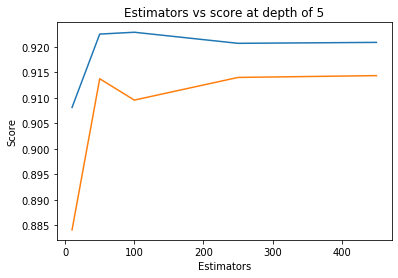

In [37]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in tqdm(estimators):
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

 11%|█         | 1/9 [00:02<00:19,  2.50s/it]

depth =  3 Train Score 0.8683123189640483 test Score 0.8540041601664067


 22%|██▏       | 2/9 [00:06<00:21,  3.07s/it]

depth =  9 Train Score 0.9589947089947091 test Score 0.9244658187264022


 33%|███▎      | 3/9 [00:11<00:21,  3.62s/it]

depth =  11 Train Score 0.9623928669465937 test Score 0.9249899719213799


 44%|████▍     | 4/9 [00:16<00:20,  4.00s/it]

depth =  15 Train Score 0.9643997850400008 test Score 0.9216570352024724


 56%|█████▌    | 5/9 [00:21<00:17,  4.27s/it]

depth =  20 Train Score 0.9645493780147245 test Score 0.9089348185349732


 67%|██████▋   | 6/9 [00:26<00:13,  4.46s/it]

depth =  35 Train Score 0.9645802022827897 test Score 0.9088996694285837


 78%|███████▊  | 7/9 [00:31<00:09,  4.59s/it]

depth =  50 Train Score 0.9645802022827897 test Score 0.9088996694285837


 89%|████████▉ | 8/9 [00:36<00:04,  4.68s/it]

depth =  70 Train Score 0.9645802022827897 test Score 0.9088996694285837


100%|██████████| 9/9 [00:41<00:00,  4.78s/it]

depth =  130 Train Score 0.9645802022827897 test Score 0.9088996694285837


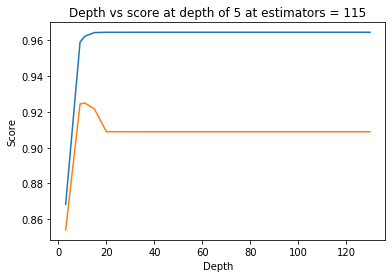

In [38]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in tqdm(depths):
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [39]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {
    "n_estimators":sp_randint(105,125),
    "max_depth": sp_randint(10,15),
    "min_samples_split": sp_randint(110,190),
    "min_samples_leaf": sp_randint(25,65)
}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',return_train_score=True,random_state=25)

rf_random.fit(df_final_train,y_train)
print(rf_random.cv_results_.keys())
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])
mean test scores [0.96249577 0.96196742 0.96053607 0.96202036 0.96406257]
mean train scores [0.96342435 0.96267979 0.96114299 0.96285379 0.96501015]


In [40]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [41]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [42]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [43]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9655578332081751
Test f1 score 0.9029197395092078


In [44]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


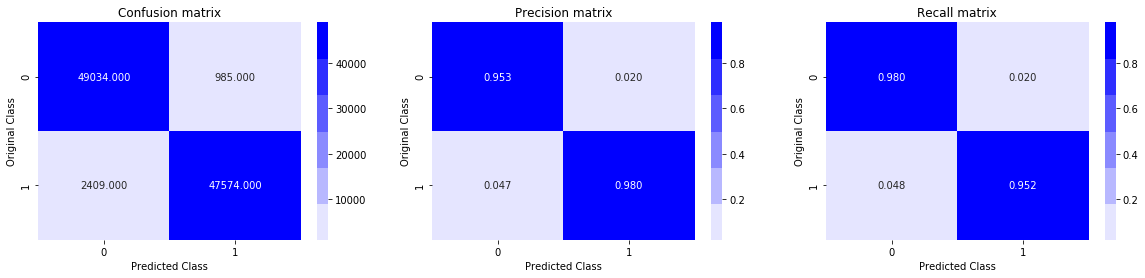

Test confusion_matrix


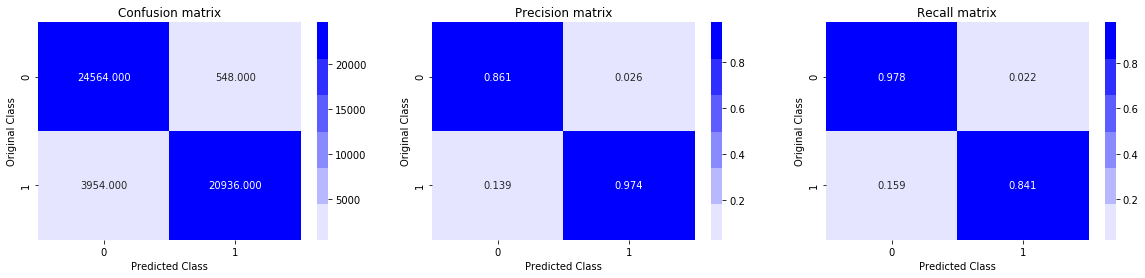

In [45]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

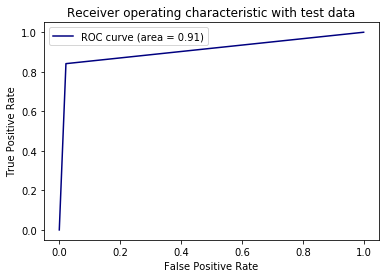

In [46]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

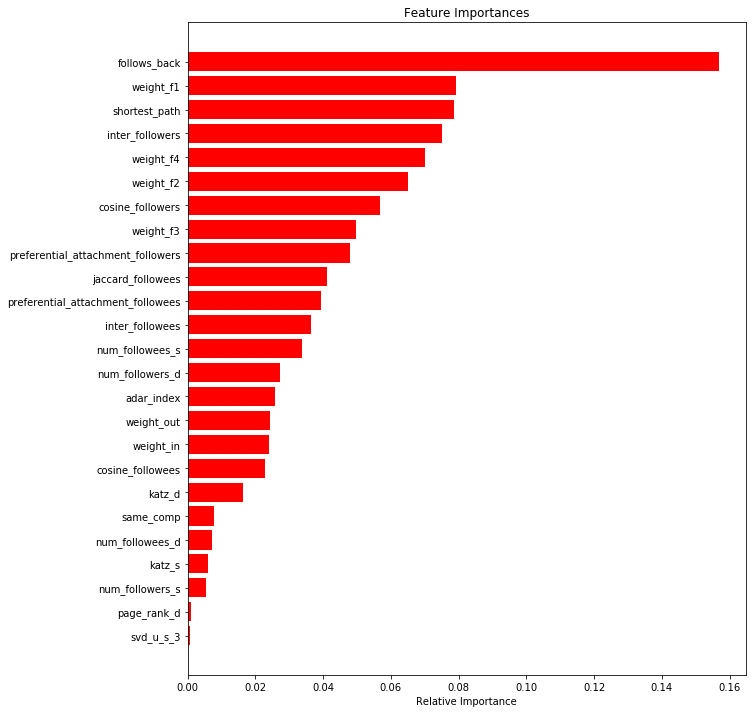

In [47]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 1.2 XGBoost

In [60]:
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5, 1],
    'max_depth': [2, 4, 8, 16],
    'subsample': [0.3, 0.4, 0.5, 0.6],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6],
    'n_estimators': [32, 64, 128, 256]
}

In [61]:
clf = xgb.XGBClassifier(objective= 'binary:logistic', eval_metric='auc', n_jobs=-1)

rs_clf = RandomizedSearchCV(clf, param_grid, n_jobs=-1, verbose=1, cv=10, scoring='roc_auc',
                            refit=True, return_train_score=True, random_state=42)

rs_clf.fit(df_final_train,y_train)

learning_rate_best = rs_clf.best_params_.get('learning_rate')
print('learning_rate_best: ', learning_rate_best)
max_depth_best = rs_clf.best_params_.get('max_depth')
print('max_depth_best: ', max_depth_best)
subsample_best = rs_clf.best_params_.get('subsample')
print('subsample_best: ', subsample_best)
colsample_bytree_best = rs_clf.best_params_.get('colsample_bytree')
print('colsample_bytree_best: ', colsample_bytree_best)
n_estimators_best = rs_clf.best_params_.get('n_estimators')
print('n_estimators_best: ', n_estimators_best)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  9.5min finished


learning_rate_best:  0.5
max_depth_best:  16
subsample_best:  0.6
colsample_bytree_best:  0.6
n_estimators_best:  32


In [62]:
best_clf = xgb.XGBClassifier(objective= 'binary:logistic', eval_metric='auc', learning_rate = learning_rate_best, 
                             max_depth = max_depth_best, subsample = subsample_best,
                             colsample_bytree = colsample_bytree_best, n_estimators = n_estimators_best, n_jobs=-1)

best_clf.fit(df_final_train,y_train)

y_train_pred = best_clf.predict(df_final_train)
y_test_pred = best_clf.predict(df_final_test)

from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9999699894963237
Test f1 score 0.9256215894855299


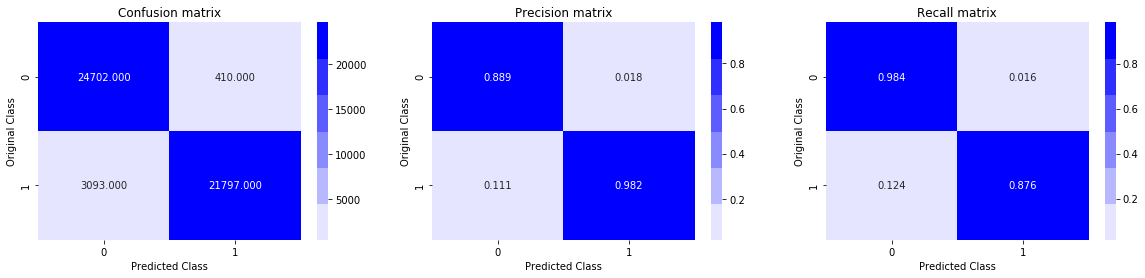

In [63]:
plot_confusion_matrix(y_test,y_test_pred)

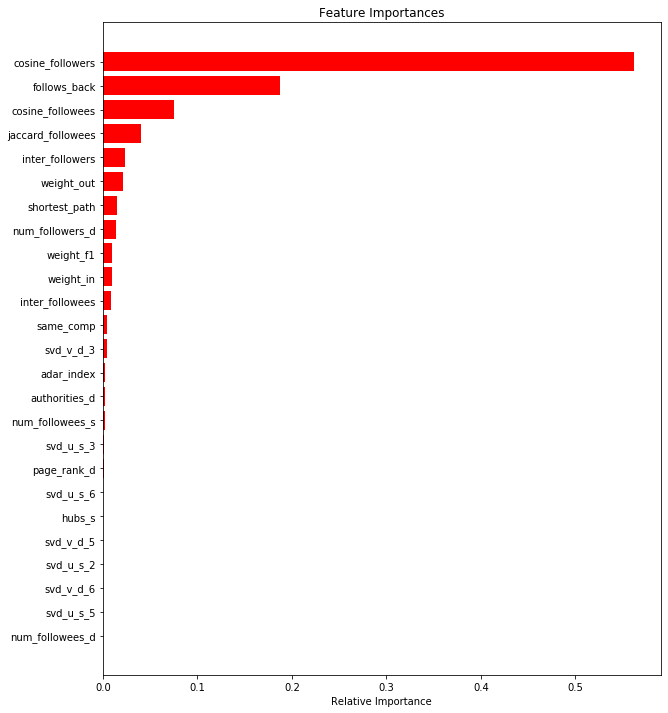

In [64]:
features = df_final_train.columns
importances = best_clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Conclusions:

In [65]:
from prettytable import PrettyTable

model_metric = PrettyTable()

model_metric = PrettyTable(["Model Name", 'f1 score-train', 'f1 score-test'])

model_metric.add_row(["Random Forrest", 0.9655,  0.9029])
model_metric.add_row(["XGBoost",0.99996,  0.92562])

print(model_metric.get_string(start=0, end=8))

+----------------+----------------+---------------+
|   Model Name   | f1 score-train | f1 score-test |
+----------------+----------------+---------------+
| Random Forrest |     0.9655     |     0.9029    |
|    XGBoost     |    0.99996     |    0.92562    |
+----------------+----------------+---------------+


## Observations:

1. In this case study the data that we train the model upon is not the actual graph data but the features we derive it from the data.

2. The given data has only the connected nodes which is marked as 1. So, the first thing we do is to generate the disconnected nodes and mark them as 0. The data should be balanced after this step.

3. The given graph data has a directed graph and upon the EDA we came conclusion that only very few nodes have a very large number of followers or followees.

4. The following featurizations are used to created the data to train a model:
    a) Jaccard Distance
    b) Cosine distance
    c) PageRank
    d) Shortest path
    e) Checking for same community(Weakely connected nodes)
    f) Adamic/Adar Index
    g) following back
    h) Katz Centrality
    i) Hits Score
    j) Preferential Attachment Feature
    k) SVD features
    l) Dot product of SVD features

5. Random Forest and XGBoost(GBDT) models were trained on the featurized data.

6. The top 5 important features from both the RF are:
    a) follows_back
    b) weight_f1
    c) shortest_path
    d) inter_followers
    e) weight_f4 

7. The top 5 important features from both the RF are:
    a) cosine_followers
    b) follows_back
    c) cosine_followees
    d) jaccard_followees
    e) inter_followers

8. There is some similarities in the top features for both the models.

9. The f1 score for both the models obtained is over 90% and XGBoost has slightly better performance than RF.

10. The above statement reflects the same in the Confusion, Precision, Recall matrices as well.